## Fast-slow consensus system

We consider the system:

\begin{align}
\dot{\mathbf{x}} &=& -D\mathbf{x} + A\mathbf{S}(\mathbf{x}, u) \\
\dot{u} &=& -\varepsilon
\end{align}

where $[\mathbf{S}(\mathbf{x},u)]_i = S(x_i,u)$

and $S(x,u) = 2x - x^2 - \frac{x^3}{3} + u$.

Take $\varepsilon = 10^{-4}$.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import pause
from matplotlib.colors import Normalize
import numpy as np
from scipy.integrate import solve_ivp
import pylab

In [2]:
g = nx.DiGraph()
g.add_edges_from([
    (1,0),
    (0,1),
    (2,0),
    (0,2)
])

In [3]:
#g = nx.complete_graph(3, create_using=nx.DiGraph())
A = nx.adjacency_matrix(g)
D = np.diag(np.asarray(np.sum(nx.adjacency_matrix(g), axis=1)).reshape(-1))

In [4]:
from scipy.linalg import orth
from scipy.linalg import null_space

In [5]:
L = D - 2*A

In [6]:
s_xu = lambda x,u: 2*x - np.square(x) - np.power(x,3) + u
phi_xu = lambda x,u: x - s_xu(x,u)

x_range = np.arange(-2, 1.5, 0.01)

p1 = np.argmin(s_xu(x_range[0:100], -1))
p2 = 200 + np.argmax(s_xu(x_range[200:], -1))

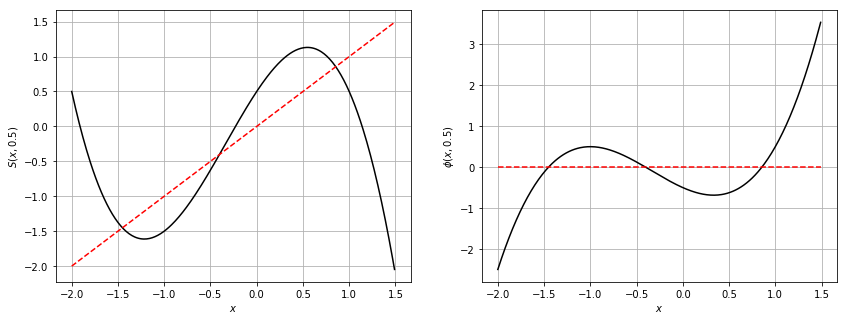

In [7]:
u = 0.5
plt.figure(figsize=(14,5))

plt.subplot(121)
plt.plot(x_range, s_xu(x_range, u), linestyle='-', color="black")
plt.plot(x_range, x_range, linestyle='--', color='red')
plt.xlabel(r'$x$')
plt.ylabel(r'$S(x,0.5)$')
plt.grid()

plt.subplot(122)
plt.plot(x_range, phi_xu(x_range, u), linestyle='-', color="black")
plt.plot(x_range, np.repeat(0,np.size(x_range)), linestyle='--', color='red')
plt.xlabel(r'$x$')
plt.ylabel(r'$\phi(x,0.5)$')
plt.grid()

Integrate

In [8]:
dt = 0.01
u_range = np.arange(0.7, 1.5, dt)
n_iter = 1000
N = nx.number_of_nodes(g)
x_n = np.zeros((np.size(u_range), N))

u = 0.5

f_t = lambda t,x:np.append(-D.dot(x[:-1]) + A.dot(s_xu(x[:-1],x[-1])), -1e-4)
res = solve_ivp(fun=f_t, t_span=[0,8000], y0=np.append(1.2 + np.random.rand(N)/10, 0.1), method="BDF")

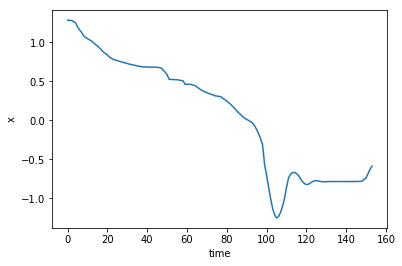

In [9]:
plt.plot(res.y[0,:])
plt.xlabel("time")
plt.ylabel("x")
plt.show()

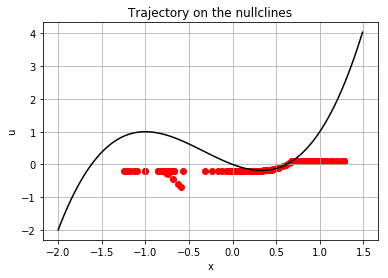

In [10]:
plt.plot(x_range, phi_xu(x_range,0), color='black')
plt.scatter(res.y[0,:], res.y[N,:], color='red')
plt.xlabel('x')
plt.ylabel('u')
plt.title('Trajectory on the nullclines')
plt.grid()

### Periodic orbits


We now make a modification to the previous system to get periodic orbits:

\begin{align}
\dot{\mathbf{x}} &=& -D\mathbf{x} + A\mathbf{S}(\mathbf{x}, u) \\
\dot{u} &=& -\frac{\varepsilon}{N} \mathbf{1}_N^T\mathbf{x}
\end{align}

In [11]:
f_t = lambda t,x:np.append(-D.dot(x[:-1]) + A.dot(s_xu(x[:-1],x[-1])), -np.mean(x[:-1])*1e-4)
res2 = solve_ivp(fun=f_t, t_span=[0,40000], y0=np.append(1.2 + np.random.rand(N)/10, 0.1), method='BDF')

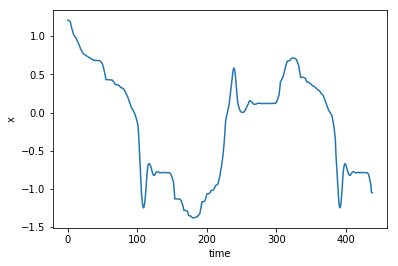

In [12]:
plt.plot(res2.y[0,:])
plt.xlabel("time")
plt.ylabel("x")
plt.show()

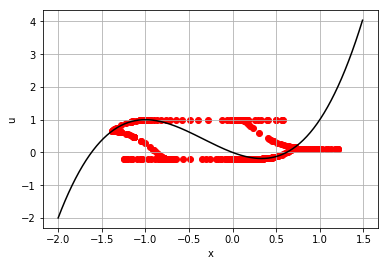

In [13]:
plt.plot(x_range, phi_xu(x_range,0), color='black')
plt.scatter(res2.y[0,:], res2.y[N,:], color='red')
plt.xlabel('x')
plt.ylabel('u')
plt.grid()

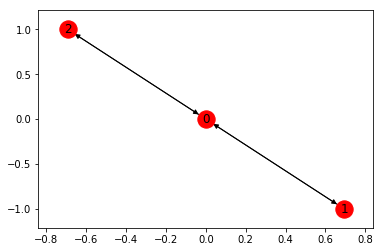

In [14]:
nx.draw_networkx(g)

In [15]:
A.todense()

matrix([[0, 1, 0],
        [1, 0, 1],
        [0, 1, 0]], dtype=int64)

In [16]:
L

matrix([[ 1, -2,  0],
        [-2,  2, -2],
        [ 0, -2,  1]], dtype=int64)

In [17]:
np.linalg.eig(L)

(array([ 4.37228132,  1.        , -1.37228132]),
 matrix([[-4.54401349e-01, -7.07106781e-01,  5.41774320e-01],
         [ 7.66184591e-01,  2.02703023e-16,  6.42620551e-01],
         [-4.54401349e-01,  7.07106781e-01,  5.41774320e-01]]))